# 리코챗 로봇
[문제 링크](https://school.programmers.co.kr/learn/courses/30/lessons/169199)

In [1]:
# bfs에 사용할 큐
qu_l = []
# 맵을 저장할 리스트
map_l = []

# 미끄러짐 이동 함수 px, nx, py, ny
def go_px(x,y):
    global map_l
    while True:
        if x == len(map_l)-1: break
        if map_l[x+1][y] == 'D': break
        x += 1
    return x, y

def go_nx(x,y):
    global map_l
    while True:
        if x == 0: break
        if map_l[x-1][y] == 'D': break
        x -= 1
    return x, y

def go_py(x,y):
    global map_l
    while True:
        if y == len(map_l[x])-1: break
        if map_l[x][y+1] == 'D': break
        y += 1
    return x, y

def go_ny(x,y):
    global map_l
    while True:
        if y == 0: break
        if map_l[x][y-1] == 'D': break
        y -= 1
    return x, y

# 이동 후 처리 함수
def post_move(_x,_y,x,y) -> bool:
    global qu_l, map_l
    # 이동한 위치가 .이라면, 원래 위치 + 1을 저장
    if map_l[_x][_y] == '.': 
        map_l[_x][_y] = map_l[x][y] + 1
        qu_l.append([_x,_y])
    # 이동한 위치가 G라면, True를 반환
    elif map_l[_x][_y] == 'G':
        map_l[_x][_y] = map_l[x][y] + 1
        return True


def solution(board):
    global qu_l, map_l
    # 미끄러짐 이동 함수를 리스트에 저장
    go_funcs = [go_px, go_nx, go_py, go_ny]
    start = [0, 0]
    
    for i in range(len(board)):
        # 맵을 리스트형식으로 변환
        # 시작점과 도착점의 좌표를 저장
        board[i] = list(board[i])
        if 'R' in board[i]:
            start[0] = i
            start[1] = board[i].index('R')
            
    # 맵을 전역변수에 저장
    map_l = board
    # 현재 위치를 큐에 저장
    qu_l.append(start)
    # 현재 위치를 방문했다고 표시
    map_l[start[0]][start[1]] = 0

    while True:
        # 큐가 비어있지만 도착점에 도착하지 못했다면, -1을 반환
        if len(qu_l) == 0: return -1

        # 현재 위치를 큐에서 꺼냄
        c_p = qu_l.pop(0)
        
        # 현재 위치에서 네방향 미끄러짐 이동
        # 이동 후 처리는 post_move 함수에서 함
        # post_move 함수는 도착점에 도착하면 True를 반환 -> 해당 값(이동 횟수)을 반환
        for go in go_funcs:
            _p = go(*c_p)
            if post_move(*_p,*c_p): return map_l[_p[0]][_p[1]]
        
    return 

In [2]:
solution(["...D..R", ".D.G...", "....D.D", "D....D.", "..D...."])

7

# 성공
- 가져온 문제
- BFS(너비우선탐색) 알고리즘을 사용하여 성공
- 이동 함수들을 리스트에 넣어 사용.
- 코드가 조금이나마 간결해짐.

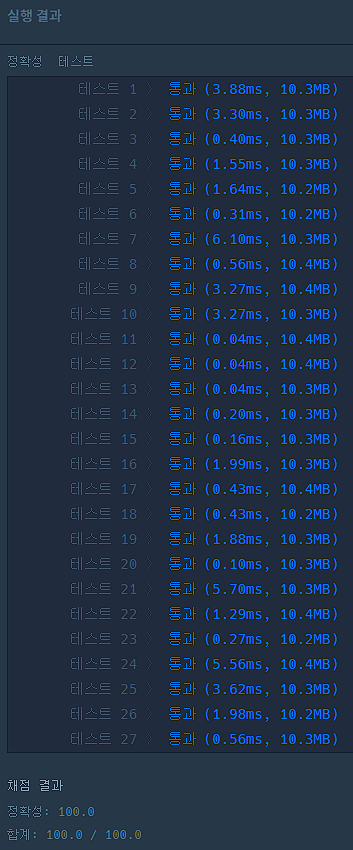

# 신규 아이디 추천
[문제 링크](https://school.programmers.co.kr/learn/courses/30/lessons/72410)

In [ ]:
import re

# 1단계 new_id의 모든 대문자를 대응되는 소문자로 치환.
def step_1(_id):
    return _id.lower()

# 2단계 new_id에서 알파벳 소문자, 숫자, 빼기(-), 밑줄(_), 마침표(.)를 제외한 모든 문자를 제거.
def step_2(_id):
    return re.sub(r'[^a-z0-9-_.]', '', _id)    # 정규식을 사용하여 제거

# 3단계 new_id에서 마침표(.)가 2번 이상 연속된 부분을 하나의 마침표(.)로 치환.
def step_3(_id):
    return re.sub(r'\.{2,}', '.', _id)

# 4단계 new_id에서 마침표(.)가 처음이나 끝에 위치한다면 제거.
def step_4(_id):
    return re.sub(r'^\.|\.$', '', _id)

# 5단계 new_id가 빈 문자열이라면, new_id에 "a"를 대입.
def step_5(_id):
    return 'a' if _id == '' else _id

# 6단계 new_id의 길이가 16자 이상이면, new_id의 첫 15개의 문자를 제외한 나머지 문자들을 모두 제거.
# 만약 제거 후 마침표(.)가 new_id의 끝에 위치한다면 끝에 위치한 마침표(.) 문자를 제거.
def step_6(_id):
    return _id[:15].rstrip('.') if len(_id) >= 16 else _id

# 7단계 new_id의 길이가 2자 이하라면, new_id의 마지막 문자를 new_id의 길이가 3이 될 때까지 반복, 끝에 붙임.
def step_7(_id):
    if len(_id) <= 2:
        _id += _id[-1] * (3 - len(_id))
    return _id


def solution(new_id):
    # 모든 단계를 순서대로 실행
    steps = [step_1, step_2, step_3, step_4, step_5, step_6, step_7]
    for step in steps:
        new_id = step(new_id)
    return new_id

In [4]:
import re
p = r'[^a-z0-9-_.]'
id = '...!@BaT#*..y.abcdefghTSDijklm'
id = id.lower()
id = re.sub(r'[^a-z0-9-_.]', '', id)
p = r'\.{2,}'
id = re.sub(r'\.{2,}', '.', id)
id = re.sub(r'^\.|\.$', '', id)
id

'bat.y.abcdefghtsdijklm'

# 성공
- 정규표현식을 이용함.
- 각 단계를 모두 함수로 정의함.
- 함수들을 담은 리스트를 이용해, 가시성이 높아짐.

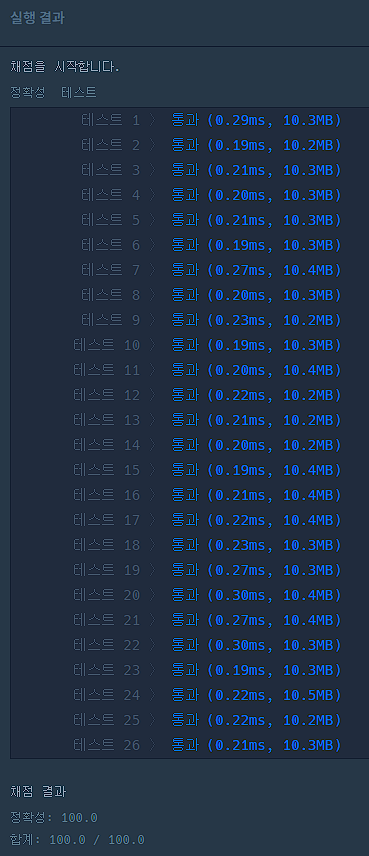

# 기능개발
[문제 링크](https://school.programmers.co.kr/learn/courses/30/lessons/42586)

In [ ]:
def solution(progresses, speeds):
    answer = []
    # list를 스택처럼 사용하기 위해 reverse
    progresses.reverse()
    speeds.reverse()
    
    while progresses:
        # 작업 진행
        for i in range(len(progresses)):
            progresses[i] += speeds[i]
        # 배포 카운트 초기화
        release_c = 0
        # 배포 가능한 작업이 있는지 확인
        while progresses:
            if progresses[-1] >= 100:
                progresses.pop()
                speeds.pop()
                release_c += 1
            else:
                break
        # 배포 가능한 작업이 있으면 배포
        if release_c > 0:
            answer.append(release_c)
    return answer

# 성공
- 리스트의 append(x)와 pop()은 모두 시간복잡도가 O(1).
- pop(1)도 사용 가능하지만, 시간복잡도가 O(n)임,
- 리스트를 스택으로 사용하기 위하여 뒤집어줌.

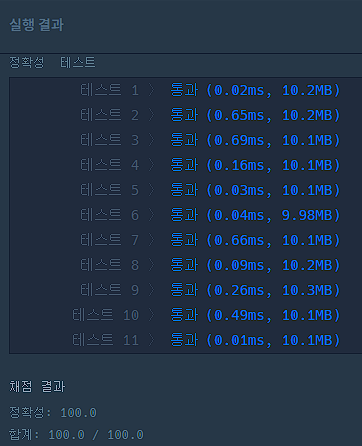

# 조이스틱
[문제 링크](https://school.programmers.co.kr/learn/courses/30/lessons/42860)

In [30]:

'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1]
[0, 1, 2, 3, 4, 5, 6, 7, 8,  9, 10, 11, 12, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1]
[0, 1, 2, 3, 4, 5, 6, 7, 8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
list(range(0,1))+list(range(0, 0, -1))

[0]

In [56]:
# 알파벳을 인덱스로 변환
def alpha_to_index(al):
    # 아스키코드로 변환 후 65를 빼줌 (A = 65 B = 66 ...)
    return ord(al) - 65

# 이동 횟수 리스트 생성
def move_count_list(length):
    l = list(range(0,length//2 + length%2))+list(range(length//2, 0, -1))
    return l

# 오른쪽 우선 이동
def move_r_first(name_list, name_m_c_l):
    answer = 0
    while True:
        #현재 위치에서 알파벳을 맞춤
        answer += name_list[0]
        name_list[0] = 0
        # 모든 알파벳이 맞춰졌는지 확인
        if sum(name_list) == 0: break

        # 이동할 위치를 초기화
        idx_to_m = 0
        # 양쪽으로 가장 가까운 바꿀 인덱스를 찾음
        for i in range(1, len(name_list)//2 + 1):
            if name_list[i] != 0:
                idx_to_m = i
                break
            if name_list[-i] != 0:
                idx_to_m = len(name_list)-i
                break
        # 이동 횟수를 더함
        answer += name_m_c_l[idx_to_m]
        # 이름 리스트를 이동
        name_list = name_list[idx_to_m:] + name_list[:idx_to_m]
    return answer

# 왼쪽 우선 이동
def move_l_first(name_list, name_m_c_l):
    answer = 0
    while True:
        #현재 위치에서 알파벳을 맞춤
        answer += name_list[0]
        name_list[0] = 0
        # 모든 알파벳이 맞춰졌는지 확인
        if sum(name_list) == 0: break

        # 이동할 위치를 초기화
        idx_to_m = 0
        # 양쪽으로 가장 가까운 바꿀 인덱스를 찾음
        for i in range(1, len(name_list)//2 + 1):
            if name_list[-i] != 0:
                idx_to_m = len(name_list)-i
                break
            if name_list[i] != 0:
                idx_to_m = i
                break
        # 이동 횟수를 더함
        answer += name_m_c_l[idx_to_m]
        # 이름 리스트를 이동
        name_list = name_list[idx_to_m:] + name_list[:idx_to_m]
    return answer

def solution(name):
    # 알파벳별 A에서의 이동 횟수
    al_move_count = move_count_list(26)
    # 이름의 알파벳을 0~25로 변환 -> A에서의 이동 횟수로 변환
    name_list = [al_move_count[alpha_to_index(al)] for al in name]
    # 이름의 0번 인덱스에서 필요한 이동 횟수
    name_m_c_l = move_count_list(len(name))
    # 오른쪽 우선, 왼쪽 우선으로 이동중 더 적은 횟수를 반환
    # list가 참조복사되어서 name_list가 바뀌면 안되므로 copy를 사용
    ar = move_r_first(list(name_list), name_m_c_l)
    al = move_l_first(list(name_list), name_m_c_l)
    # print(name_list)
    # print(ar, al)
    answer = min(ar, al)

    return answer

In [59]:
print(solution("JEROEN"))
print(solution("JAN"))
print(solution("ABABAAAAABA")) # 7
print(solution("BBBBAAAAABB"))


[9, 4, 9, 12, 4, 13]
[9, 4, 9, 12, 4, 13]
[0, 4, 9, 12, 4, 13]
56 56
56
[9, 0, 13]
[9, 0, 13]
[0, 0, 13]
23 23
23
[0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0]
[0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0]
[0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0]
11 11
11
[1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1]
[1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1]
[0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1]
14 13
13


## 실패
- 이동부분의 어려움이있음.
- 알파벳을 바꿔야 하는 곳들 중에서, 가장 가까운 곳부터 시작하면 될거라고 생각.
- ABABAAAAABA 는 오히려 먼쪽부터 돌아야했음.
- 문자열을 받았을 때 가장 긴 연속 A의 인덱스를 찾아야 할것 같음.

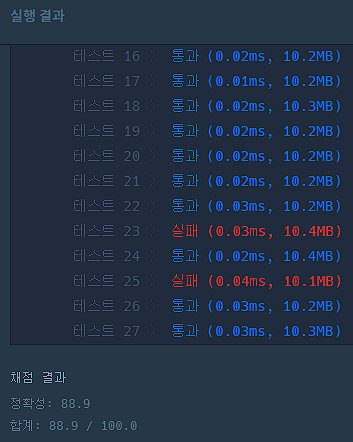

In [29]:
import re

# 알파벳별 A에서의 이동 횟수
al_c = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

# 커서 이동횟수 구하는 함수.
# idx는 현재 커서 위치, name은 이름, default_drr은 기본 이동 방향
def get_mv_sum(name, default_drr='r'):
    
    # 오른쪽 노드로 이동하는 함수
    def move_r(r_idx, r_side_length):
        # 오른쪽 간선의 길이를 더함
        r_side_length += edge_lengths[r_idx]
        if r_idx == len(edge_lengths)-1: r_idx = -1  # 마지막 노드의 경우
        # 오른쪽 간선의 노드로 커서를 이동
        r_idx += 1
        # 오른쪽 간선의 노드를 방문했다고 표시
        is_completes[r_idx] = 0
        return r_idx, r_side_length
    
    # 왼쪽 노드로 이동하는 함수
    def move_l(l_idx, l_side_length):
        # 왼쪽 간선의 길이를 더함
        l_side_length += edge_lengths[l_idx-1]
        # 왼쪽 간선의 노드로 커서를 이동
        l_idx -= 1
        # 왼쪽 간선의 노드를 방문했다고 표시
        is_completes[l_idx] = 0
        return l_idx, l_side_length
    
    # 커서 이동횟수를 구하기 위한 타겟의 인덱스 리스트
    target_idxs = [i for i in range(len(name)) if name[i] != 'A' or i == 0]
    # 각 노드 사이의 거리를 구함
        # 노드 인덱스와 같은 인덱스는 오른쪽으로 이동하는 거리
        # 노드 인덱스-1과 같은 인덱스는 왼쪽으로 이동하는 거리
    edge_lengths = []
    for i in range(len(target_idxs)):
        j = i+1
        # 마지막 노드의 경우
        if j == len(target_idxs):
            j = 0
            l = len(name[target_idxs[i]:] + name[:target_idxs[j]])
            edge_lengths.append(l)
            break
        edge_lengths.append(abs(target_idxs[i] - target_idxs[j]))

    # 시작 노드에서 양 방향으로 얼마나 갔는지 저장하는 변수
    l_side_length = 0
    r_side_length = 0
    # 노드의 방문 여부 확인용 리스트 (0: 방문 안함, 1: 방문함)
    # 길이를 하나 더 길게한 이유는, 범위 밖의 인덱스를 방문했을 때 오류를 방지하기 위함
    is_completes = [1 for _ in range(len(target_idxs))]
    # 시작 노드는 방문했다고 표시
    is_completes[0]= 0
    # 좌우방향 시작 노드의 인덱스
    l_idx = 0
    r_idx = 0
    
    # 기본 이동 방향 저장
    last_dir = default_drr
    # 모두 방문할 때까지 반복
    while sum(is_completes):
        # 오른쪽 간선의 길이가 더 짧은 경우
        if edge_lengths[r_idx] < edge_lengths[l_idx-1]:
            r_idx, r_side_length = move_r(r_idx, r_side_length)
            last_dir = 'r'
        # 왼쪽 간선의 길이가 더 짧은 경우
        elif edge_lengths[r_idx] > edge_lengths[l_idx-1]:
            l_idx, l_side_length = move_l(l_idx, l_side_length)
            last_dir = 'l'
        # 양쪽 간선의 길이가 같은 경우, 이전에 이동한 방향으로 이동
        else:
            if last_dir == 'r':
                r_idx, r_side_length = move_r(r_idx, r_side_length)
                last_dir = 'r'
            else:
                l_idx, l_side_length = move_l(l_idx, l_side_length)
                last_dir = 'l'

    # 전체 길이는 오른쪽 간선의 길이 + 왼쪽 간선의 길이 + 더 짧은 간선의 길이
    # 더 짧은 간선을 더해주는 이유는 전체 길이를 최소화하기 위해서.
        # 더 긴 간선을 한번 더 돌아가는 것보다
        # 더 짧은 간선을 다시 돌아가는 것이 더 빠르기 때문.
        # 더 짧은 간선이 0이라면, 값의 변화가 없음
    total_length = l_side_length + r_side_length + min(l_side_length, r_side_length)

    # 한방향으로만 돌때의 길이를 구함
    del_l_A = len(re.sub(r'^A+', '', name))
    del_r_A = len(re.sub(r'A+$', '', name))-1
    # 모두 A인 경우가 있을 수 있으므로, 0보다 작은 값이 나오면 0으로 바꿔줌
    one_side = max( 0 , min(del_l_A, del_r_A))
    
    # 전체 길이와 한방향으로만 돌때의 길이 비교
    total_length = min(total_length, one_side)
    
    return total_length

def solution(name):
    # 이름의 알파벳 이동 횟수들의 합
    al_sum = sum([al_c[ord(al) - 65] for al in name])
    # 이름에서의 커서 이동횟수
    mv_sum = 0
    
    # 커서 이동횟수 구하기
    # 기본 이동방향이 오른쪽인지 왼쪽인지에 따라 가끔 오류가 발생할 수 있음
    # 둘 모두 구해주고, 더 작은 값을 반환
    mv_sum = min(get_mv_sum(name), get_mv_sum(name, 'l'))

    # 커서이동횟수 + 알파벳이동횟수
    answer = al_sum + mv_sum
    return answer

In [30]:
print(solution("JEROEN"))
print(solution("JAN"))
print(solution("ABABAAAAABA")) # 7 + 3
print(solution("BAAA"))
print(solution("AAAA"))
print(solution("ABABAAAAAB"))
print(solution("BBBAAAB"))
print(solution("ABAAAAB"))
print(solution("ABAB"))
print(solution("AABBB"))
print(solution("BBBAA"))
print(solution("BBBAAABB"))
print(solution("BBAABAB"))
print(solution("BBBABAABAAAABBB"))
print(solution("ABAAAAAAAAABB"))
print(solution("AAABAAAA"))
print(solution("AAABAAAAB"))
print(solution("AZAAAZ"))
print(solution("AAAZAAZA"))
print(solution("AAAZAAZAZAA"))
print(solution("AAAAABBAAAAAAABAAA"))

56
23
10
1
0
8
8
5
5
6
5
11
9
21
7
4
7
5
7
11
16


# 성공
- 진짜 간신히 풀었음.
- 시작점에서 양쪽으로 뻗어나가는 방식으로 생각함.
    - 양쪽 팔중 다음 노드랑 더 가까운 간선을 이동.
    - 짧은쪽 팔을 다시 돌아오는 용도로 사용.
    - 마지막에 다른 케이스와도 비교.
- 생각해 볼수 있는 테스트 케이스들을 넣어도 안잡히는 12번 테스트 케이스 오류가 있었음.
    - 무조건 한방향으로만 돌때의 비교를 넣어서 해결.
    - 한방향 케이스에서는 정규표현식을 활용
    - 앞과 뒤의 A를 각각 지우고 길이를 재는것으로 해결.

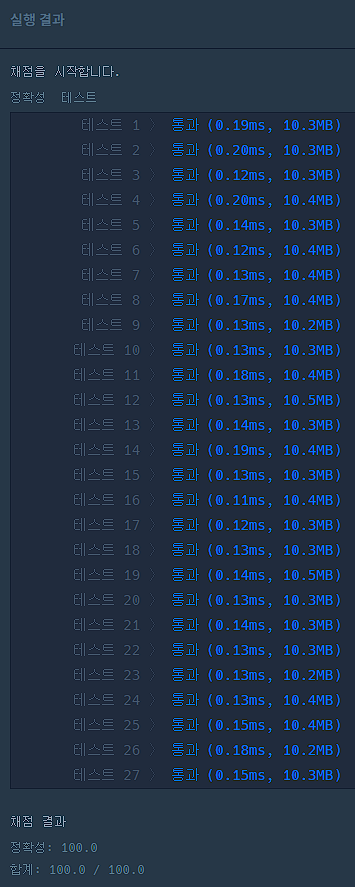